<a href="https://colab.research.google.com/github/Kolojo7/Google_Colab/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


linear Kernel Performance:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        47
           1       0.89      0.93      0.91        43

    accuracy                           0.91        90
   macro avg       0.91      0.91      0.91        90
weighted avg       0.91      0.91      0.91        90


rbf Kernel Performance:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        47
           1       0.98      0.93      0.95        43

    accuracy                           0.96        90
   macro avg       0.96      0.95      0.96        90
weighted avg       0.96      0.96      0.96        90


poly Kernel Performance:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        47
           1       0.97      0.91      0.94        43

    accuracy                           0.94        90
   macro avg       0.95      0.94      0.94      

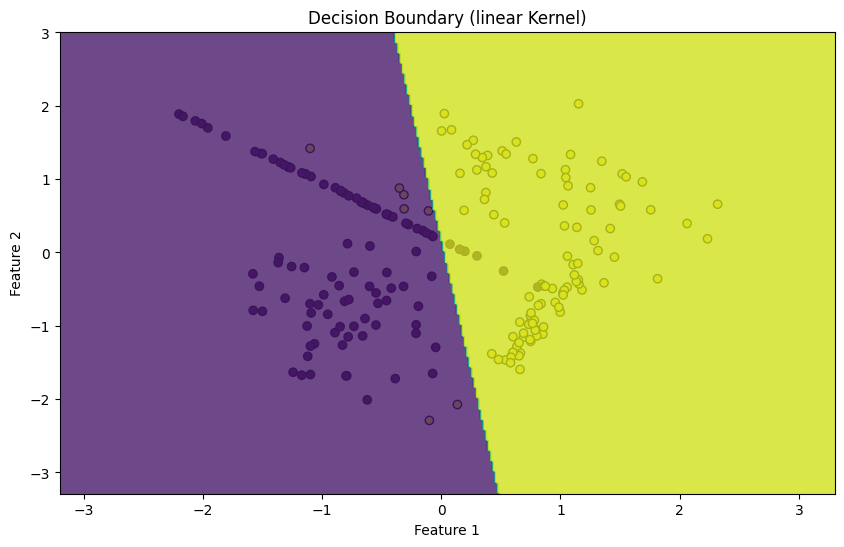

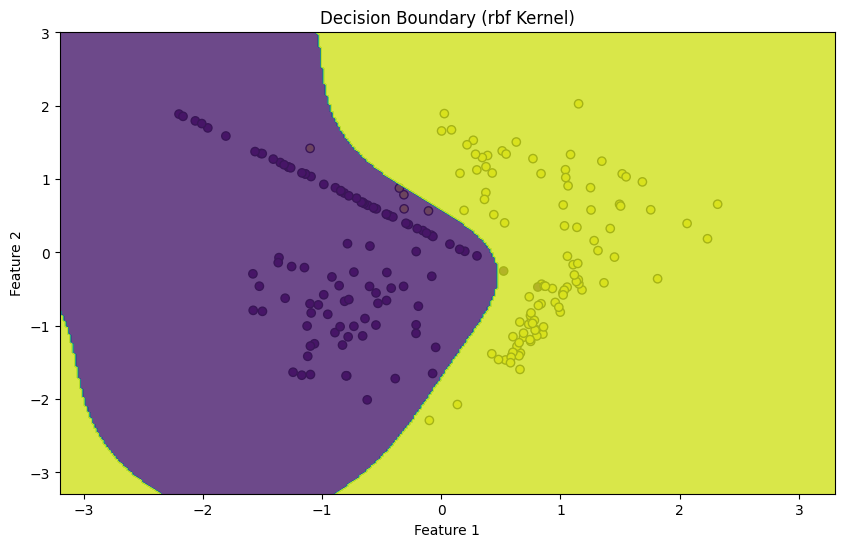

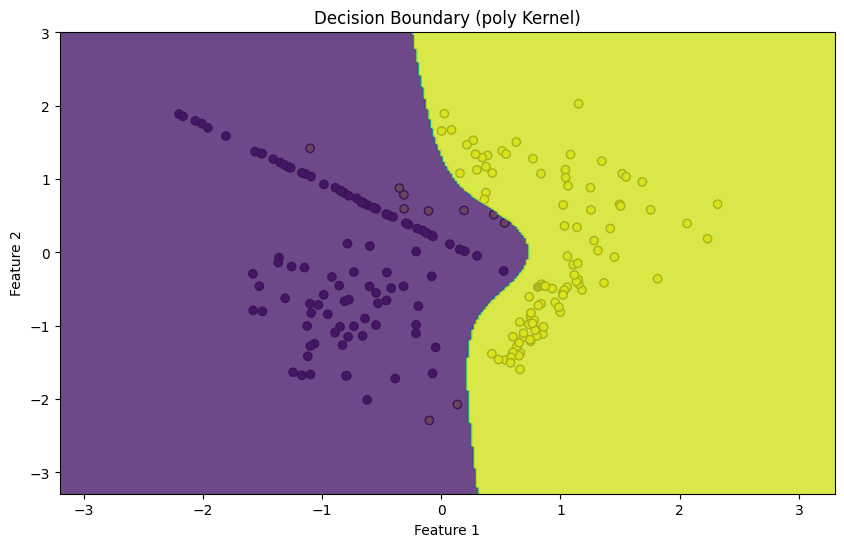

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification

def svm_classification_challenge():

    # 1. Data Generation
    X, y = make_classification(
        n_samples=300,
        n_features=2,
        n_redundant=0,
        random_state=42
    )

    # 2. Data Preprocessing
    X_scaled = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.3, random_state=42
    )

    # 3. SVM Training with Different Kernels
    kernels = ['linear', 'rbf', 'poly'] # kernels with linear, rbf, and poly
    results = {}

    for kernel in kernels:
        svm_classifier = SVC(kernel=kernel)
        svm_classifier.fit(X_train, y_train)

        # Predictions
        y_pred = svm_classifier.predict(X_test)

        # Performance Metrics
        results[kernel] = {
            'accuracy': svm_classifier.score(X_test, y_test),
            'classification_report': classification_report(y_test, y_pred),
            'confusion_matrix': confusion_matrix(y_test, y_pred),
            'model': svm_classifier
        }

        print(f"\n{kernel} Kernel Performance:")
        print(results[kernel]['classification_report'])

    # 4. Visualization Function
    def plot_decision_boundary(kernel):
        plt.figure(figsize=(10, 6))

        # Plot training points
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', label='Training Data')

        '''
        Source for this part: https://scikit-learn.org/dev/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html
        '''
         # Create meshgrid
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                             np.arange(y_min, y_max, 0.02))

        # Plot decision boundary
        model = results[kernel]['model']
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.8)

        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title(f'Decision Boundary ({kernel} Kernel)')
        plt.show()

    # Visualize decision boundaries
    for kernel in kernels:
        plot_decision_boundary(kernel)

    return results

# Run the challenge
challenge_results = svm_classification_challenge()